# Import libraries

In [1]:
import imutils
import cv2 as cv
import matplotlib.pyplot as plt
%matplotlib inline
from skimage.exposure import is_low_contrast

# Functions

In [2]:
def display_image(img):
    fig = plt.figure(figsize=(6,6))
    ax = fig.add_subplot(111)
    ax.imshow(img, cmap="gray")

In [3]:
def display_multiple_images(images, row, col, figsize=(6, 6)):
    images = [[data[0], ""] if len(data) == 1 else data for data in images]
    _, axs = plt.subplots(row, col, figsize=figsize)
    axs = axs.flatten()
    for (image, title), ax in zip(images, axs):
        ax.imshow(image, cmap="gray")
        ax.set_title(title)
    plt.tight_layout()
    plt.show()

# Extract and transform image

In [34]:
image = cv.imread("../data/input/low_extrusor_3d_printing.png")
image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
gray_image = cv.cvtColor(image, cv.COLOR_RGB2GRAY)
# Slightly blur the image and perform edge detection
blur_image = cv.GaussianBlur(gray_image, (5, 5), 0)
edged = cv.Canny(blur_image, 30, 150)
# Initialize the text and color to indicate that the input image is not low contrast
text = "Low contrast: No"
color = (0, 255, 0)

# Check image contrast

In [35]:
# Checks if the image is low contrast
if is_low_contrast(gray_image, fraction_threshold=0.35):
    text = "Low contrast: Yes"
    color = (0, 0, 255)
# Otherwise, the image is not low contrast, so we can continue processing it
else:
    # Find contours in the edge map and find the largest one, which we will asume is the outline of our color correction card
    contours = cv.findContours(edged.copy(), cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
    contours = imutils.grab_contours(contours)
    c = max(contours, key=cv.contourArea)
    
    # Draw the largest contour on the image
    cv.drawContours(image, [c], -1, (0, 255, 0), 2)
    
# Draw the text on the output image
cv.putText(image, text, (0, 70), cv.FONT_HERSHEY_SIMPLEX, 3, color, 2)

array([[[106,  99,  93],
        [ 96,  89,  83],
        [ 63,  56,  50],
        ...,
        [106, 100, 104],
        [ 73,  67,  71],
        [ 43,  38,  44]],

       [[103,  96,  90],
        [104,  97,  91],
        [ 76,  69,  63],
        ...,
        [110, 104, 108],
        [ 69,  63,  67],
        [ 44,  39,  45]],

       [[102,  95,  89],
        [115, 108, 102],
        [ 93,  86,  80],
        ...,
        [116, 110, 114],
        [ 68,  62,  66],
        [ 46,  41,  47]],

       ...,

       [[ 25,  24,  22],
        [ 22,  21,  19],
        [ 21,  20,  18],
        ...,
        [ 15,  15,  15],
        [ 15,  15,  15],
        [ 18,  16,  17]],

       [[ 23,  22,  20],
        [ 22,  21,  19],
        [ 24,  23,  21],
        ...,
        [ 16,  16,  16],
        [ 16,  16,  16],
        [ 19,  17,  18]],

       [[ 25,  24,  22],
        [ 25,  24,  22],
        [ 30,  29,  27],
        ...,
        [ 17,  17,  17],
        [ 16,  16,  16],
        [ 21,  19,  20]]

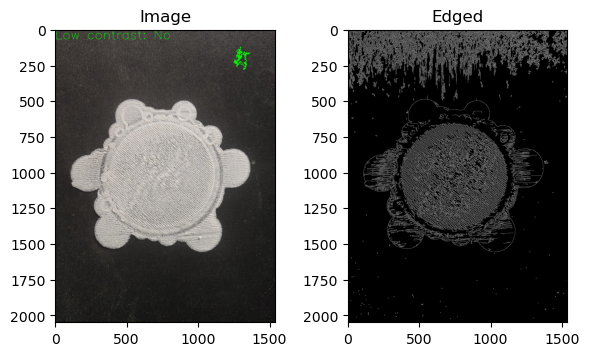

In [36]:
display_multiple_images([
    [image, "Image"],
    [edged, "Edged"]], 
    1, 2)